# PARTIKEL SWARM

In [289]:
import numpy as np
import random

## 1. inisialisasi parameter

In [290]:
#inisialisasi parameter

D = 2 #Dimensi Permasalahan
maxit = 100
p = 4 # partikel
xmin = -10
xmax = 10
C1 = 2 #nilainya bebas
C2 = 2 #nilainya bebas
vmax = 100 #kecepatan
vmin = -100 #kecepatan

Pi = np.zeros((p,D)) #probabilitas
fobj = np.zeros(p)
v = np.zeros((p,D))

print(Pi)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## 2. inisialisasi

In [291]:
for i in range(0, p):
    for j in range(0, D):
        Pi[i][j] = (random.random()*(xmax-xmin)+xmin)
        fobj[i] = fobj[i]+Pi[i][j]**2
print("Posisi x1, x2: \n", Pi)
print("Fungsi Sphere: \n", fobj)

Posisi x1, x2: 
 [[-4.63066969  8.14413518]
 [-3.55655143 -9.5601958 ]
 [ 3.15980303 -7.23848789]
 [ 3.38867911  9.15326749]]
Fungsi Sphere: 
 [ 87.77003957 104.04640189  62.38006207  95.26545186]


In [292]:
#untuk belajar yang dari individu (C1)
PBest = Pi
PBest_val = fobj

#untuk belajar social learning (C2)
g_val = fobj.min()
idx = fobj.argmin()
g = Pi[idx][:]
print("Tetangga terbaik: ", g, "dengan nilai obj: ", g_val)
ghist = np.zeros(maxit)
ghist[0] = g_val

Tetangga terbaik:  [ 3.15980303 -7.23848789] dengan nilai obj:  62.380062070662866


## 3. loop hingga kriteria berhenti

In [293]:
#loop hingga kriteria berhenti

for iter in range(0, maxit):
    for i in range(0, p):
        temp_eval = 0
        for j in range(0, D):
            #update kecepatan
            v[i][j] = v[i][j] + random.random()*C1*(PBest[i][j]-Pi[i][j]) + random.random()*C2*(g[j]-Pi[i][j])
            v[i][j] = random.random()*(vmax-vmin)+vmin

            #cek apakah terjadi ledakan partikel(>vmax atau <vmin)
            if v[i][j] > vmax:
                v[i][j] = vmax
            elif v[i][j] < vmin:
                v[i][j] = vmin

            #bergerak ke posisi baru
            Pi[i][j] = Pi[i][j] + v[i][j]
            temp_eval = temp_eval + Pi[i][j]**2
        fobj[i] = temp_eval
        #print("Fungsi ke-", i, ": ", fobj[i])

            #Elitism - Mencari Personal Best
        if temp_eval < PBest_val[i]:
            PBest_val[i] = temp_eval
            PBest[i][:] = Pi[i][:]
        print("PBest ke-", i, ": ", PBest[i])
           

            #Elitism - Mencari Global Best
        if temp_eval < g_val:
            g_val = temp_eval
            g = Pi[i][:]

    print("partikel terbaik ke-", iter, ": ", g_val, "partikel: ", g)
    ghist[iter] = g_val  
    print("Ghist ke-", iter, ": ", ghist[iter], ", ", g_val)
            

PBest ke- 0 :  [89.85523947 77.52487563]
PBest ke- 1 :  [94.55744566  0.9399735 ]
PBest ke- 2 :  [ 24.4928057  -68.15475553]
PBest ke- 3 :  [-16.99890642 101.13603362]
partikel terbaik ke- 0 :  62.380062070662866 partikel:  [ 24.4928057  -68.15475553]
Ghist ke- 0 :  62.380062070662866 ,  62.380062070662866
PBest ke- 0 :  [ 72.59556216 130.71034483]
PBest ke- 1 :  [ 61.39230959 -75.35872954]
PBest ke- 2 :  [ 118.55596123 -113.51347702]
PBest ke- 3 :  [79.65853536 57.25507465]
partikel terbaik ke- 1 :  62.380062070662866 partikel:  [ 118.55596123 -113.51347702]
Ghist ke- 1 :  62.380062070662866 ,  62.380062070662866
PBest ke- 0 :  [ 58.11181087 225.55776301]
PBest ke- 1 :  [  73.86859993 -146.25823707]
PBest ke- 2 :  [  29.07181275 -155.7769842 ]
PBest ke- 3 :  [96.36465936 36.14375101]
partikel terbaik ke- 2 :  62.380062070662866 partikel:  [  29.07181275 -155.7769842 ]
Ghist ke- 2 :  62.380062070662866 ,  62.380062070662866
PBest ke- 0 :  [ 19.4144998  157.68461179]
PBest ke- 1 :  [ 52

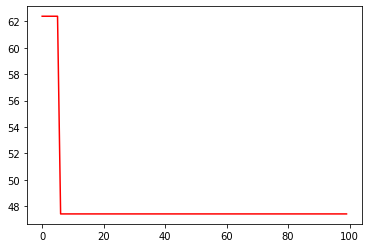

In [294]:
#plot hasil terbaik terhadap iterasi
import matplotlib.pyplot as plt
epochs  = range(maxit)

plt.plot(epochs, ghist, color='red', label='Global Best')